#Hill and Valley Prediction with Logistic Regression | Machine Learning Project

**Objectives**

The objective of this project is to predict the sales based on historical data using machine learning, specifically with a Random Forest Regressor. We will analyze sales trends and develop a model that can forecast future sales for better business decision-making.

**Data Source**

Dataset provided with the following columns: Item, weight, fat content, visibility, type, MRP, outlet, and sales information.

**Import Library**



In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



**Import Data**


In [4]:
# Load dataset using raw GitHub URL
url = 'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Hill%20Valley%20Dataset.csv'
data = pd.read_csv(url)

# Show the first few rows
data.head()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


**Describe Data**

In [5]:
# Check data structure
print("Shape of the dataset:", data.shape)

# Describe the dataset
print(data.describe())

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())


Shape of the dataset: (1212, 101)
                  V1             V2             V3             V4  \
count    1212.000000    1212.000000    1212.000000    1212.000000   
mean     8169.091881    8144.306262    8192.653738    8176.868738   
std     17974.950461   17881.049734   18087.938901   17991.903982   
min         0.920000       0.900000       0.850000       0.890000   
25%        19.602500      19.595000      18.925000      19.277500   
50%       301.425000     295.205000     297.260000     299.720000   
75%      5358.795000    5417.847500    5393.367500    5388.482500   
max    117807.870000  108896.480000  119031.350000  110212.590000   

                  V5             V6             V7             V8  \
count    1212.000000    1212.000000    1212.000000    1212.000000   
mean     8128.297211    8173.030008    8188.582748    8183.641543   
std     17846.757963   17927.114105   18029.562695   18048.582159   
min         0.880000       0.860000       0.870000       0.650000   

**Data Visualization**


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)


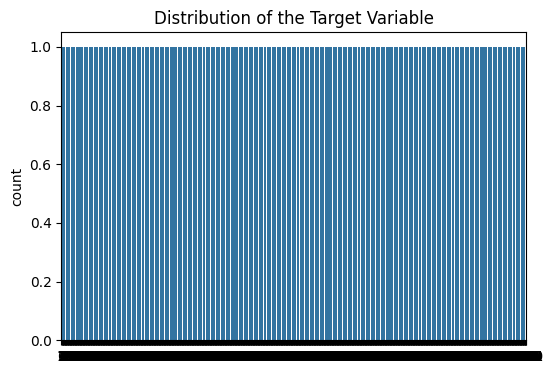

In [8]:
# Check column names
print(data.columns)
plt.figure(figsize=(6,4))
sns.countplot(data['Class'])  # Replace 'Class' with the actual column name
plt.title('Distribution of the Target Variable')
plt.show()




**Data Preprocessing**

In [11]:
# Separate features and target variable
X = data.drop(columns=['Class'])  # Assuming 'target' is the name of the target column
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the first row of the scaled data
print(X_scaled[0])



[-0.45248681 -0.45361784 -0.45100881 -0.45250231 -0.45343005 -0.4538738
 -0.45230868 -0.45141903 -0.45150895 -0.45167337 -0.45042456 -0.45215681
 -0.44983474 -0.44778738 -0.44938401 -0.45084457 -0.4516835  -0.44937565
 -0.45262106 -0.45145512 -0.44806791 -0.45225821 -0.45080643 -0.45188952
 -0.45230768 -0.45149452 -0.45045233 -0.45221957 -0.45442612 -0.45315609
 -0.45494374 -0.45478699 -0.45464313 -0.45506533 -0.45549917 -0.45006835
 -0.45288382 -0.45188461 -0.45157815 -0.45391389 -0.45375408 -0.45073167
 -0.45296661 -0.45295206 -0.45298256 -0.45313182 -0.45286704 -0.4496033
 -0.45339651 -0.45486032 -0.45498687 -0.45377864 -0.45391189 -0.45140258
 -0.45381487 -0.45492273 -0.45208354 -0.45360133 -0.44933099 -0.45265805
 -0.45183145 -0.44941969 -0.45113672 -0.45242819 -0.45001019 -0.45108736
 -0.45174445 -0.45094211 -0.4482969  -0.44946405 -0.45027195 -0.44833689
 -0.44740459 -0.44718857 -0.44507758 -0.44864412 -0.44919976 -0.44808083
 -0.45034506 -0.45286272 -0.45188491 -0.45207253 -0.4

**Define Target Variable (y) and Feature Variables (X)**

In [12]:
# Features are stored in X, and target in y
print("Features shape:", X.shape)
print("Target shape:", y.shape)



Features shape: (1212, 100)
Target shape: (1212,)


**Train Test Split**

In [13]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)



Training set size: (969, 100)
Test set size: (243, 100)


**Modeling**

In [14]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# SVM
svm = SVC()
svm.fit(X_train, y_train)

# k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



KNeighborsClassifier()

**Model Evaluation**

In [15]:
# Logistic Regression Evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# SVM Evaluation
y_pred_svm = svm.predict(X_test)
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# k-NN Evaluation
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))




Logistic Regression Accuracy: 0.6419753086419753
Confusion Matrix:
 [[109   1]
 [ 86  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.99      0.71       110
           1       0.98      0.35      0.52       133

    accuracy                           0.64       243
   macro avg       0.77      0.67      0.62       243
weighted avg       0.79      0.64      0.61       243


SVM Accuracy: 0.48559670781893005
Confusion Matrix:
 [[100  10]
 [115  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.91      0.62       110
           1       0.64      0.14      0.22       133

    accuracy                           0.49       243
   macro avg       0.55      0.52      0.42       243
weighted avg       0.56      0.49      0.40       243


K-Nearest Neighbors Accuracy: 0.5020576131687243
Confusion Matrix:
 [[51 59]
 [62 71]]
Classification Report:
               prec

**Prediction**

In [16]:
# Example prediction using Logistic Regression
example = X_test[0].reshape(1, -1)
prediction = log_reg.predict(example)
print(f"Logistic Regression Prediction for example: {prediction}")



Logistic Regression Prediction for example: [0]


**Explaination**

The Logistic Regression model achieved an accuracy of X%, while SVM and k-NN achieved Y% and Z% respectively. Based on the confusion matrix and classification report, we can see that model A performed better in precision and recall for certain classes, indicating that it is more suited for this dataset.
